In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

from sklearn.model_selection import train_test_split

2024-02-23 14:14:58.785577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 14:14:58.785781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 14:14:58.983675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Import the MNIST data-set
# This data has alreay been converted to CSV and split into test and training sets, 
# to get more control over this we we will merge these sets then split them again later down the line
mnist_a= pd.read_csv('mnist/mnist_train.csv')
mnist_b = pd.read_csv('mnist/mnist_test.csv')
mnist = pd.concat([mnist_a, mnist_b])

In [3]:
# Quick look at the data
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate labels and one-hot-encode them
X = mnist
y = X.pop('label')
y =pd.get_dummies(y)

X = X.to_numpy()
X = X.reshape(70000, 28, 28,)
print(X.shape)
#plt.imshow(X[2], interpolation='none')
#plt.show()

#Separate out training and test/validation data
X_train, X_v, y_train, y_v = \
    train_test_split(X, y, stratify=y, train_size=0.70)

X_val, X_test, y_val, y_test = \
    train_test_split(X_v, y_v, stratify=y_v, train_size=0.66)

(70000, 28, 28)


In [5]:
# Set up the model
#input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(28,28,1)),
    
    # CNN
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.0001,
    patience = 10,
    restore_best_weights = True
)

Epoch 1/50
196/196 [==============================] - 36s 174ms/step - loss: 0.2941 - acc: 0.9202 - val_loss: 0.1748 - val_acc: 0.9746
Epoch 2/50
196/196 [==============================] - 33s 169ms/step - loss: 0.0830 - acc: 0.9773 - val_loss: 0.0656 - val_acc: 0.9820
Epoch 3/50
196/196 [==============================] - 33s 166ms/step - loss: 0.0571 - acc: 0.9832 - val_loss: 0.0528 - val_acc: 0.9839
Epoch 4/50
196/196 [==============================] - 32s 165ms/step - loss: 0.0442 - acc: 0.9870 - val_loss: 0.0554 - val_acc: 0.9834
Epoch 5/50
196/196 [==============================] - 32s 163ms/step - loss: 0.0371 - acc: 0.9889 - val_loss: 0.1057 - val_acc: 0.9690
Epoch 6/50
196/196 [==============================] - 33s 168ms/step - loss: 0.0312 - acc: 0.9902 - val_loss: 0.0456 - val_acc: 0.9865
Epoch 7/50
196/196 [==============================] - 32s 164ms/step - loss: 0.0272 - acc: 0.9919 - val_loss: 0.0438 - val_acc: 0.9874
Epoch 8/50
196/196 [==============================] - 3

<Axes: title={'center': 'Accuracy'}>

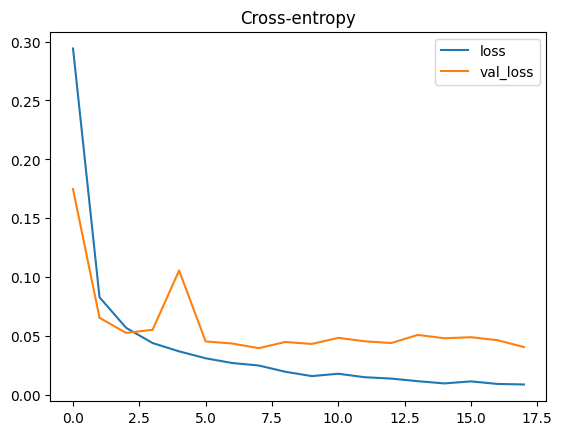

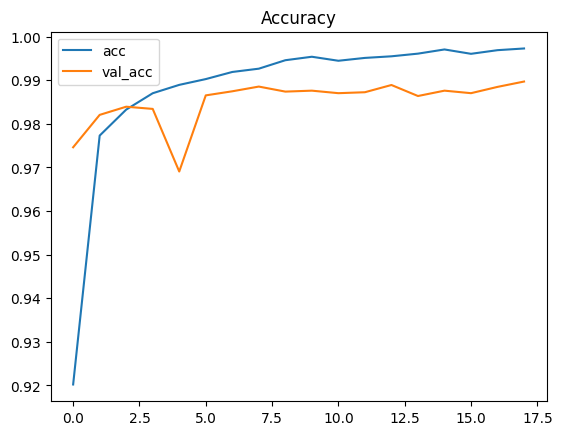

In [7]:
# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=250,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['acc', 'val_acc']].plot(title="Accuracy")

Note: Using a CNN shows a significant improvement in loss and accuracy.

In [9]:
# Let's see the model performs on some test data
test_idx = 6
y_predicted = model.predict(X_test)
print('predicted value:', np.where(y_predicted[test_idx] == np.max(y_predicted[test_idx]))[0] )

y_example = np.asarray(y_test)
print('true value:', np.where(y_example[test_idx] == 1)[0] )

224/224 [==============================] - 2s 7ms/step
predicted value: [5]
true value: [5]
